In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import xtrack as xt
import xpart as xp
import xobjects as xo
from cpymad.madx import Madx
import pybt

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Initialise PS model with:

- East Area Slow Extraction scenario
- Pb-54 particles

In [3]:
mad = Madx()

#mad.call('../../../../models/acc-models-ps/scenarios/bare_machine/1_ion_injection_energy/ps_ion_bare_machine.beam')

mad.input("BEAM, PARTICLE=Pb54, BRHO=80.05538284755649, MASS=0.931494*(207.947/208.), CHARGE=54./208.;")

mad.call('../../../../models/acc-models-ps/ps_mu.seq')
mad.call('../../../../models/acc-models-ps/ps_ss.seq') 
mad.call('../../../../models/acc-models-ps/scenarios/east/4_slow_extraction/ps_se_east.str')
mad.call("../../../../models/acc-models-ps/_scripts/macros.madx")

mad.input('exec, write_str_file("ps_se_east.str");')

mad.use(sequence='PS')
mad.input('exec, ptc_twiss_macro(2,0,0);')
mad.input('exec, write_ptc_twiss("ps_se_east.tfs")')


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2023.03.02 16:52:16      +
  ++++++++++++++++++++++++++++++++++++++++++++
/**********************************************************************************

*

* Elements description and sequence file for each PS main unit (MU).

*

* 07/10/2020 - Alexander Huschauer

************************************************************************************/



/************************************************************************************

*

*         DEFINITION OF FOCUSING AND DEFOCUSING HALF-UNITS OF THE MU               

*

*************************************************************************************/



/************************************************************************************

*        							 F HALF-UNITS     					            

***********************

True

In [4]:
initial_twiss = mad.twiss()

enter Twiss module
  
iteration:   1 error:   1.819621E-03 deltap:   0.000000E+00
orbit:   2.101246E-03  1.661586E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   2.558824E-05 deltap:   0.000000E+00
orbit:   2.091665E-03  1.667237E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   1.003865E-09 deltap:   0.000000E+00
orbit:   2.091665E-03  1.667237E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
          628.3185                 -0      0.02580777089        6.224790689 

                q1                dq1            betxmax              dxmax 
       6.323299708       -1.684739829        32.28796336        4.499795455 

             dxrms             xcomax             xcorms                 q2 
       2.738519209      0.03408032387     0.007371706694        6.218892911 

               dq2            

In [5]:
print(f"{'Horizontal tune:':<18}{initial_twiss.summary['q1']:>17.7f}")
print(f"{'Vertical tune:':<18}{initial_twiss.summary['q2']:>17.7f}")
print(f"{'Magnetic rigidity:':<18}{mad.eval('BEAM->BRHO'):>17.7f}")

Horizontal tune:          6.3232997
Vertical tune:            6.2188929
Magnetic rigidity:       80.0553828


In [6]:
damper = mad.sequence().expanded_elements['pr.kfb97']
kfb_twiss = initial_twiss.dframe().loc[initial_twiss.dframe().name.str.startswith(damper.name)]

Diagram shows basic PS horizontal displacement and angle, and location of the PR.KFB97 strip-line kicker

Text(0.5, 0.98, 'Reference orbit')

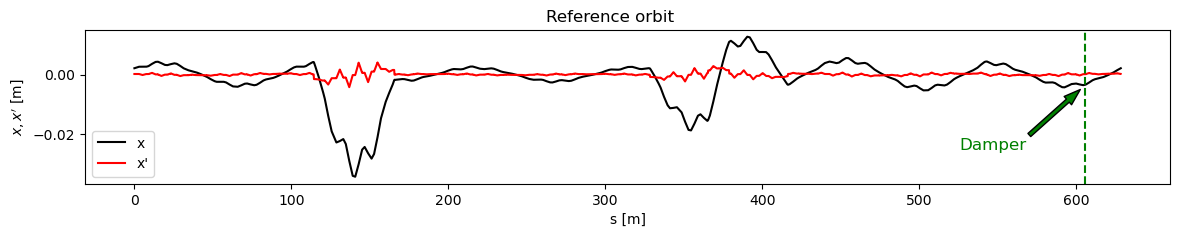

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(14, 2))
ax.plot(initial_twiss.s, initial_twiss.x, 'k', label='x')
ax.plot(initial_twiss.s, initial_twiss.px, 'r', label='x\'')
ax.axvline(kfb_twiss.s[0], color='g', linestyle='--')
ax.annotate('Damper', (kfb_twiss.s[0]-3, -0.005), (kfb_twiss.s[0]-80, -0.025), arrowprops={'width': 3, 'headwidth': 8, 'facecolor': 'green'}, color='g', size=12)
ax.set_xlabel('s [m]')
ax.set_ylabel(r'$x, x^\prime$ [m]')
ax.legend()
fig.suptitle("Reference orbit")

## Cycle sequence to start at the ESE

In [8]:
### Cycle sequence, changing starting point and adding markers at around the magnet 62
mad.input('SEQEDIT, sequence=PS;')
mad.input('FLATTEN;')
mad.input('CYCLE, START=PR.BPM23;') # This will be the place to start the ejection sequence
mad.input('FLATTEN;')
mad.input('ENDEDIT;')
mad.use(sequence = "PS")
mad.input('savebeta, label=bumped23, place = PR.BPM23;')
twiss_cycled_raw = mad.twiss()
twiss_cycled = twiss_cycled_raw.dframe()

++++++ info: seqedit - number of elements installed:  0
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0
enter Twiss module
  
iteration:   1 error:   5.603511E-02 deltap:   0.000000E+00
orbit:  -3.149127E-02 -1.169344E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   2.062934E-03 deltap:   0.000000E+00
orbit:  -3.379506E-02 -1.891997E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   6.214711E-06 deltap:   0.000000E+00
orbit:  -3.379558E-02 -1.889973E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   4 error:   5.115029E-11 deltap:   0.000000E+00
orbit:  -3.379558E-02 -1.889974E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
          628.3185                 -0  

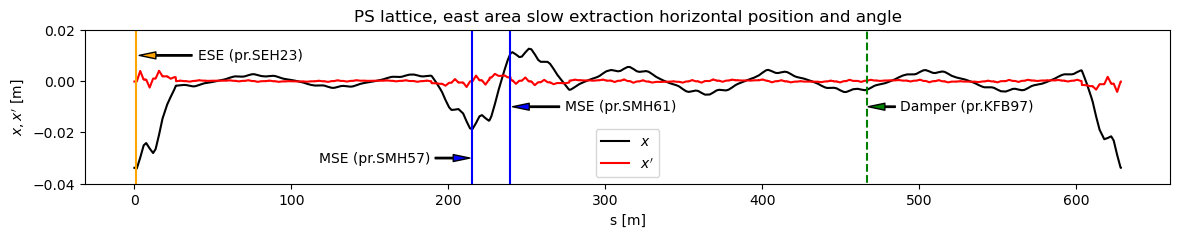

In [9]:
fig, ax = plt.subplots(figsize=(14,2))
ax.plot(twiss_cycled.s, twiss_cycled.x, 'k', label=r'$x$')
ax.plot(twiss_cycled.s, twiss_cycled.px, 'r', label=r'$x^\prime$')
ax.set_ylim(-0.040,0.020)
ax.set_xlabel('s [m]')
ax.set_ylabel(r'$x, x^\prime$ [m]')

kfb_twiss_cycled = twiss_cycled.loc[twiss_cycled.name.str.startswith(damper.name)]

ax.vlines(twiss_cycled.s["pe.seh23"],-0.1,0.1, color="orange")
ax.vlines(twiss_cycled.s["pe.smh57"],-0.1,0.1, color="blue")
ax.vlines(twiss_cycled.s["pe.smh61"],-0.1,0.1, color="blue")
ax.vlines(twiss_cycled.s["pr.kfb97"],-0.1,0.1, color="green", linestyle="--")
ax.annotate('ESE (pr.SEH23)',
        xy=(twiss_cycled.s["pe.seh23"], 0.01), xycoords='data',
        xytext=(120, 0), textcoords='offset points',
        arrowprops=dict(facecolor='orange', shrink=0.05, headwidth=5, width=1),
        horizontalalignment='right', verticalalignment='center')
ax.annotate('MSE (pr.SMH57)',
        xy=(twiss_cycled.s["pe.smh57"], -0.03), xycoords='data',
        xytext=(-30, 0), textcoords='offset points',
        arrowprops=dict(facecolor='blue', shrink=0.05, headwidth=5, width=1),
        horizontalalignment='right', verticalalignment='center')
ax.annotate('MSE (pr.SMH61)',
        xy=(twiss_cycled.s["pe.smh61"], -0.01), xycoords='data',
        xytext=(120, 0), textcoords='offset points',
        arrowprops=dict(facecolor='blue', shrink=0.05, headwidth=5, width=1),
        horizontalalignment='right', verticalalignment='center')
ax.annotate('Damper (pr.KFB97)',
        xy=(twiss_cycled.s["pr.kfb97"], -0.01), xycoords='data',
        xytext=(120, 0), textcoords='offset points',
        arrowprops=dict(facecolor='green', shrink=0.05, headwidth=5, width=1),
        horizontalalignment='right', verticalalignment='center')
ax.set_title("PS lattice, east area slow extraction horizontal position and angle")
ax.legend()

# Tracking

## Tune_Match code

In [10]:
PS_REPO = "/Users/ash/cern/models/acc-models-ps"

def tune_match(Qx):
    """
    Tune match function for the PS lattice.
    
      Parameters:
        Qx: Horizontal tune

        ex: Horizontal emittance
        ey: Vertical emittance

      Reference:
        https://mad.web.cern.ch/mad/webguide/manual.html CHAPTER 7.1
    """
    with open('tempfile', 'w') as f:
        madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)
    madx.set(format="22.10e") # 22 numbers total, 10 behind decimal

    # Create beam
    madx.input("BEAM, PARTICLE=Pb54, BRHO=80.05538284755649, MASS=0.931494*(207.947/208.), CHARGE=54./208.;")

    # Call lattice files
    madx.call(PS_REPO + "/ps_mu.seq")
    madx.call(PS_REPO + "/ps_ss.seq")
    madx.call(PS_REPO + "/scenarios/east/4_slow_extraction/ps_se_east.str")
    madx.use(sequence = "PS")

    # Print to check
    print("BEAM->PC\t", madx.eval("BEAM->PC;"))
    print("BEAM->BRHO\t", madx.eval("BEAM->BRHO;"))
    print(madx.sequence().beam)

    # No bump
    madx.input('''
    PE.BSW57.53   , KICK := 0.0;
    PE.BSW57.59   , KICK := 0.0;
    PE.BSW57.61   , KICK := 0.0;
    PE.BSW57.67   , KICK := 0.0;
    ''')
    # turn off kicks on corrector magnets (dipole horizontal, type 206/205/213/206)
    
    madx.use(sequence="PS")
    madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APER_1,APER_2,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
    twiss_initial = madx.twiss().dframe()
    
    madx.input('''
    ptc_twiss_macro(order, dp, slice_flag): macro = {
      ptc_create_universe;
      ptc_create_layout, time=false, model=2, exact=true, method=6, nst=3;
      IF (slice_flag == 1){
        select, flag=ptc_twiss, clear;
        select, flag=ptc_twiss, column=name,keyword,s,l,x,px,beta11,beta22,disp1,k1l;
        ptc_twiss, closed_orbit, icase=56, no=order, deltap=dp, table=ptc_twiss, summary_table=ptc_twiss_summary, slice_magnets=true;
      }
      ELSE{
        select, flag=ptc_twiss, clear;
        select, flag=ptc_twiss, column=name,keyword,s,x,px,beta11,alfa11,beta22,alfa22,disp1,disp2,mu1,mu2,energy,l,angle,K1L,K2L,K3L,HKICK,SLOT_ID;    
        ptc_twiss, closed_orbit, icase=56, no=order, deltap=dp, table=ptc_twiss, summary_table=ptc_twiss_summary, normal;
      }
      ptc_end;
    };

    ''')
    # ptc_create_layout: matrix-kick-matrix model, integration order 6, 3 integration steps
    
    # ***********************************************************************************
    # *                    Matching using the Pole Face Windings                        * 
    # ***********************************************************************************
    madx.input("Qx   := "+str(Qx)+"; !Horizontal Tune")

    madx.input('''
    use, sequence=PS;
    match, use_macro;
            vary, name = k1prpfwf;
            vary, name = k1prpfwd;
            vary, name = k2prpfwf;
            vary, name = k2prpfwd;
            use_macro, name = ptc_twiss_macro(2,0,0);
            constraint, expr = table(ptc_twiss_summary,Q1)  = Qx;
    jacobian,calls=50000,bisec=3;
    ENDMATCH;
    ''')
    
    madx.use(sequence="PS")
    twiss_tune_matching = madx.twiss().dframe() # Needed to refresh the tune values
    madx.input('qx = table(SUMM, Q1);')
    
    tune_info_dict = {"Qx": madx.globals["qx"]}
    pfw_dict = {"k1prpfwf": madx.globals["k1prpfwf"], "k1prpfwd": madx.globals["k1prpfwd"], "k2prpfwf": madx.globals["k2prpfwf"], "k2prpfwd": madx.globals["k2prpfwd"]}

    print (f"H-tune: {round(tune_info_dict['Qx'],3)}")
    print (f"")
    print (f"PFW settings: \n  k1prpfwf: {round(pfw_dict['k1prpfwf'],6)}\n  k1prpfwd: {round(pfw_dict['k1prpfwd'],6)}\n  k2prpfwf: {round(pfw_dict['k2prpfwf'],6)}\n  k2prpfwd: {round(pfw_dict['k2prpfwd'],6)}")

    madx.quit()
    
    return pfw_dict, tune_info_dict

## Linear relationship between Q and PFW

> Cell takes 2 minutes

In [11]:
pfws = {}
pfw_df = pd.DataFrame(columns = ['q', 'k1prpfwf', 'k1prpfwd', 'k2prpfwf', 'k2prpfwd'])

for q in np.linspace(0.2, 0.4, 4):
    pfw, tune_info = tune_match(Qx=q)
    pfw['q'] = q
    pfw_df = pd.concat([pfw_df, pd.DataFrame(pfw, index=[0])], ignore_index=True)

pfw_df.plot(x = 'q', subplots=True, xlabel="Tune")

In [12]:
# fig, ax = plt.subplots(4, 1, figsize=(7, 5), sharex=True)
# coefs = {}
# for i, magnet in enumerate(['k1prpfwf', 'k1prpfwd', 'k2prpfwf', 'k2prpfwd']):
#     x = np.array(pfw_df['q'])
#     y = np.array(pfw_df[magnet])
#     # linear fit
#     p = np.polyfit(x, y, 1)
#     ax.flatten()[i].plot(x, y, 'kx', label=magnet)
#     ax.flatten()[i].plot(x, np.polyval(p, x), label='fit')
#     ax[i].legend()
#     ax[i].set_ylabel('pfw')
#     coefs[magnet] = p
# ax[i].set_xlabel('tune')

In [13]:
# def get_pfws(q):
#     return {
#         'k1prpfwf': np.polyval(coefs['k1prpfwf'], q),
#         'k1prpfwd': np.polyval(coefs['k1prpfwd'], q),
#         'k2prpfwf': np.polyval(coefs['k2prpfwf'], q),
#         'k2prpfwd': np.polyval(coefs['k2prpfwd'], q),
#     }

def get_pfws(q):
    return {
        'k1prpfwf': np.polyval([ 0.00176321, -0.00066479], q),
        'k1prpfwd': np.polyval([ 0.00120316, -0.00032583], q),
        'k2prpfwf': np.polyval([-3.56569444e-06, -2.22121647e-03], q),
        'k2prpfwd': np.polyval([-2.05340161e-06, -3.98646953e-03], q),
    }

# Changing tune

In [14]:
twiss_before_raw = mad.twiss()
tune_before = twiss_before_raw.summary['q1']

enter Twiss module
  
iteration:   1 error:   5.603511E-02 deltap:   0.000000E+00
orbit:  -3.149127E-02 -1.169344E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   2.062934E-03 deltap:   0.000000E+00
orbit:  -3.379506E-02 -1.891997E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   6.214711E-06 deltap:   0.000000E+00
orbit:  -3.379558E-02 -1.889973E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   4 error:   5.115029E-11 deltap:   0.000000E+00
orbit:  -3.379558E-02 -1.889974E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
          628.3185                 -0      0.02580777089        6.224790689 

                q1                dq1            betxmax              dxmax 
       6.323299708       -1.684739829        32.28796336        4.499795455 

             dxrms            

In [18]:
tune_target = 0.33
pfw_settings = get_pfws(tune_target)
for magnet, value in pfw_settings.items():
    mad.input(f"{magnet} := {value};")

++++++ info: k1prpfwf redefined
++++++ info: k1prpfwd redefined
++++++ info: k2prpfwf redefined
++++++ info: k2prpfwd redefined


In [21]:
pfw_settings

{'k1prpfwf': -8.293069999999985e-05,
 'k1prpfwd': 7.121280000000002e-05,
 'k2prpfwf': -0.0022223931491652,
 'k2prpfwd': -0.0039871471525313}

In [19]:
twiss_after_raw = mad.twiss()
tune_after = twiss_after_raw.summary['q1']

enter Twiss module
  
iteration:   1 error:   5.725844E-02 deltap:   0.000000E+00
orbit:  -3.118397E-02 -1.008161E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   2.147345E-03 deltap:   0.000000E+00
orbit:  -3.365562E-02 -1.875270E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   7.045876E-06 deltap:   0.000000E+00
orbit:  -3.365641E-02 -1.873032E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   4 error:   6.016502E-11 deltap:   0.000000E+00
orbit:  -3.365641E-02 -1.873032E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
          628.3185                 -0      0.02572932583        6.234272718 

                q1                dq1            betxmax              dxmax 
       6.333369394       -1.755130829        32.02312868        4.496416013 

             dxrms            

In [20]:
print(f"{'Tune before match:':<20}{tune_before:.7f}")
print(f"{'Tune after match:':<20}{tune_after:.7f}")

Tune before match:  6.3232997
Tune after match:   6.3333694


# Tracking with MAD-X

In [52]:
twiss_before_makethin_raw = mad.twiss()
tune_before_makethin = twiss_before_makethin_raw.summary['q1']

enter Twiss module
  
iteration:   1 error:   5.352127E-02 deltap:   0.000000E+00
orbit:  -3.222894E-02 -1.504014E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   1.884162E-03 deltap:   0.000000E+00
orbit:  -3.410755E-02 -1.936434E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   4.895110E-06 deltap:   0.000000E+00
orbit:  -3.410764E-02 -1.934743E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   4 error:   3.806798E-11 deltap:   0.000000E+00
orbit:  -3.410764E-02 -1.934743E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
          628.3185                 -0      0.02596084453        6.206411855 

                q1                dq1            betxmax              dxmax 
       6.303565091       -1.551135093        32.90076657        4.508923551 

             dxrms            

In [53]:
print(f"{'Tune Before Makethin:':<25}{tune_before_makethin:.7f}")
# print(f"{'Tune After Makethin:':<25}{tune_after_makethin:.7f}")

Tune Before Makethin:    6.3035651


In [54]:
twiss_before_makethin_raw.summary

{'sequence': 'PS', 'particle': 'PB54', 'mass': 0.9312566482, 'charge': 0.2596153846, 'energy': 6.299978107, 'pc': 6.230769231, 'gamma': 6.765028867, 'kbunch': 1.0, 'bcurrent': 7.477501385e-14, 'sige': 0.001, 'sigt': 1.0, 'npart': 1.0, 'ex': 1.0, 'ey': 1.0, 'et': 0.001, 'bv_flag': 1.0, 'length': 628.3185, 'alfa': 0.02596084453, 'orbit5': -0.0, 'gammatr': 6.206411855, 'q1': 6.303565091, 'q2': 6.236497309, 'dq1': -1.551135093, 'dq2': -5.444883416, 'dxmax': 4.508923551, 'dymax': 0.0, 'xcomax': 0.03439912451, 'ycomax': 0.0, 'betxmax': 32.90076657, 'betymax': 29.57806335, 'xcorms': 0.007483645905, 'ycorms': 0.0, 'dxrms': 2.751077068, 'dyrms': 0.0, 'deltap': 0.0, 'synch_1': 0.0, 'synch_2': 0.0, 'synch_3': 0.0, 'synch_4': 0.0, 'synch_5': 0.0, 'synch_6': 0.0, 'synch_8': 0.0, 'dqmin': 0.0, 'dqmin_phase': 0.0}

In [55]:
#gamma = twiss_after_makethin_raw.summary['gamma']
gamma = twiss_before_makethin_raw.summary['gamma']
alfa = twiss_before_makethin_raw.summary['alfa']
#beta = np.sqrt(1-gamma**(-2))
beta = (1+alfa**2)/gamma

N_PARTICLES = int(50)
#particles = pybt.tools.particles.beam_distrib_line(twiss_after_raw.summary['alfa'], beta, 1e-6, N_PARTICLES, 1)
particles = pybt.tools.particles.beam_distrib_line(alfa, beta, 1e-6, N_PARTICLES, 1)
#particles = [[1e-3, 1e-3], [1e-4, 1e-4]]

In [61]:
beta

0.14791865417308514

In [62]:
twiss_after_makethin_raw.summary

{'sequence': 'PS', 'particle': 'PB54', 'mass': 0.9312566482, 'charge': 0.2596153846, 'energy': 6.299978107, 'pc': 6.230769231, 'gamma': 6.765028867, 'kbunch': 1.0, 'bcurrent': 7.477501385e-14, 'sige': 0.001, 'sigt': 1.0, 'npart': 1.0, 'ex': 1.0, 'ey': 1.0, 'et': 0.001, 'bv_flag': 1.0, 'length': 628.3185, 'alfa': 0.02629966327, 'orbit5': -0.0, 'gammatr': 6.166303635, 'q1': 6.276589461, 'q2': 6.246179688, 'dq1': -6.143918545, 'dq2': -4.225454458, 'dxmax': 4.383702735, 'dymax': 0.0, 'xcomax': 0.02112605215, 'ycomax': 0.0, 'betxmax': 38.71129441, 'betymax': 30.80723721, 'xcorms': 0.01075617107, 'ycorms': 0.0, 'dxrms': 2.772651782, 'dyrms': 0.0, 'deltap': 0.0, 'synch_1': 0.0, 'synch_2': 0.0, 'synch_3': 0.0, 'synch_4': 0.0, 'synch_5': 0.0, 'synch_6': 0.0, 'synch_8': 0.0, 'dqmin': 0.0, 'dqmin_phase': 0.0}

# PTC Track

In [56]:
mad.ptc_create_universe()
mad.ptc_create_layout(model=2, method=6, exact=True, NST=10)
mad.ptc_observe(place='pe.seh23')
with mad.batch():
    for particle in particles:
        mad.ptc_start(x=particle[0], px=particle[1])
    mad.ptc_track(icase=4, element_by_element=True, dump=False, onetable=True, recloss=True, turns=250, closed_orbit=True)
    mad.ptc_track_end()
ptc_output = mad.table.trackone
ptc_output = ptc_output.dframe()
mad.input("""
select, flag=ptc_twiss, clear;
select, flag=ptc_twiss, column=name,keyword,s,x,px,beta11,alfa11,beta22,alfa22,disp1,disp2,mu1,mu2,energy,l,angle,K1L,K2L,K3L,HKICK,SLOT_ID;    
ptc_twiss, closed_orbit, icase=56, no=2, deltap=0, table=ptc_twiss, summary_table=ptc_twiss_summary, normal;
""")
tune_after_ptc_track = mad.table['ptc_twiss_summary']['q1'][0]

Determined SECTOR NMUL MAX :  3
 MAD-X Beam Parameters
                  Energy : 0.629998E+01
          Kinetic Energy : 0.536872E+01
      Particle Rest Mass : 0.931257E+00
                Momentum : 0.623077E+01
 Cannot do spin : provide a=g-2. Now it is set to zero.
 Setting MADx with 
     energy           6.2999781072515830     
     method                   6
     Num. of steps           10
     charge          0.25961538461538464     
  Length of machine:    628.31850000000350     
 The machine is a RING
 ------------------------------------ PTC Survey ------------------------------------
 Before start:    0.0000000000000000        0.0000000000000000        0.0000000000000000     
 Before   end:    0.0000000000000000        0.0000000000000000        0.0000000000000000     
 After  start:    0.0000000000000000        0.0000000000000000        0.0000000000000000     
 After    end:   -1.0154131521805446E-010   0.0000000000000000       -1.7958963649533644E-008
obs_points: 2 
 ****

In [23]:
FILENAME = 'ptc_trackone.csv'
with open(FILENAME, 'w') as f:
    f.write('loc')

ptc_output.to_csv(FILENAME, mode='a')
ptc_trackone_loaded = pd.read_csv(FILENAME)
ptc_trackone_loaded_seh = ptc_trackone_loaded.loc[ptc_trackone_loaded['loc'] == 'pe.seh23']

fig, ax = plt.subplots(1, 3, figsize=(4*3, 4))

ptc_trackone_loaded_seh.loc[ptc_trackone_loaded_seh['turn'].isin([1])].plot(x='x', y='px', kind='scatter', marker='.', c='r', ax=ax[0])
ptc_trackone_loaded_seh.loc[ptc_trackone_loaded_seh['turn'].isin([125])].plot(x='x', y='px', kind='scatter', marker='.', c='g', ax=ax[1])
ptc_trackone_loaded_seh.loc[ptc_trackone_loaded_seh['turn'].isin([250])].plot(x='x', y='px', kind='scatter', marker='.', c='b', ax=ax[2])
ax[0].set_title('Turn 1')
ax[1].set_title('Turn 125')
ax[2].set_title('Turn 250')
for x in ax:
    x.set_xlabel('x [m]')
    x.set_ylabel('px [rad]')
#fig.suptitle(f"Tune = {tw.summary['q1']:.2f}")

Text(0, 0.5, 'px [mrad]')

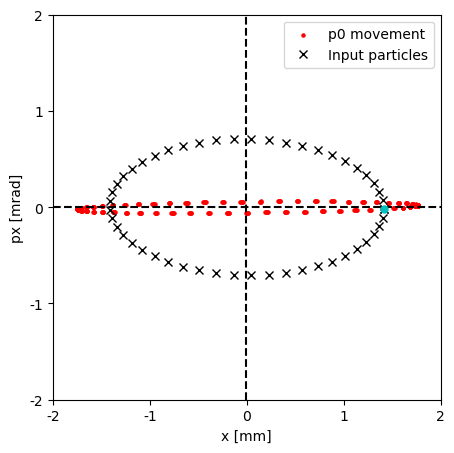

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ptc_trackone_loaded_seh.loc[ptc_trackone_loaded_seh['number'] == 1].plot(x='x', y='px', kind='scatter', marker='.', c='r', ax=ax, label='p0 movement')
ax.axvline(x=ptc_trackone_loaded_seh.loc[ptc_trackone_loaded_seh['number'] == 1]['x'].mean(), c='k', linestyle="--")
ax.axhline(y=ptc_trackone_loaded_seh.loc[ptc_trackone_loaded_seh['number'] == 1]['px'].mean(), c='k', linestyle="--")
ax.plot(particles.T[0], particles.T[1], 'x', c='k', label='Input particles')
ax.plot(particles[0][0], particles[0][1], '.', c='c', markersize=10)
ax.legend()

ax.set_xticks([-0.002, -0.001, 0, 0.001, 0.002])
ax.set_xticklabels(['-2', '-1', '0', '1', '2'])
ax.set_xlabel('x [mm]')

ax.set_yticks([-0.002, -0.001, 0, 0.001, 0.002])
ax.set_yticklabels(['-2', '-1', '0', '1', '2'])
ax.set_ylabel('px [mrad]')

In [25]:
print(f"{'Tune Before PTC:':<25}{tune_before_makethin:.7f}")
print(f"{'Tune After PTC:':<25}{tune_after_ptc_track:.7f}")

Tune Before PTC:         6.3035651
Tune After PTC:          0.3035704


# Normal Tracking

In [26]:

mad.select(flag='makethin', class_='rbend', slice_=16)
mad.select(flag='makethin', class_='quadrupole', slice_=16)
mad.select(flag='makethin', class_='sbend', slice_=16)
mad.makethin(sequence='ps')

twiss_after_makethin_raw = mad.twiss()
tune_after_makethin = twiss_after_makethin_raw.summary['q1']

makethin: slicing sequence : ps
enter Twiss module
++++++ warning: division by zero, result set to zero, expr: - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrtb * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrtb * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrtb * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result se

In [27]:
mad.use(sequence='ps')
mad.track(recloss=True, onetable=True)
for particle in particles:
    mad.start(x=particle[0], px=particle[1])
# mad.start(x=1e-3, px=1e-3)
# mad.start(x=1e-2, px=1e-2)
mad.observe(place='pe.seh23')
mad.run(turns=500)
mad.endtrack()

enter TRACK module
losses recorded
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l ) * ( 0.23 ) ) / ( 16 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l ) * ( 0.23 ) ) / ( 16 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l ) * ( 0.23 ) ) / ( 16 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l ) * ( 0.23 ) ) / ( 16 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l ) * ( 0.23 ) ) / ( 16 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l ) * ( 0.23 ) ) / ( 16 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->

True

In [28]:
FILENAME = 'trackone.csv'
with open(FILENAME, 'w') as f:
    f.write('loc')

mad.table['trackone'].dframe().to_csv(FILENAME, mode='a')

In [29]:
trackone_loaded = pd.read_csv(FILENAME)
trackone_loaded_seh = trackone_loaded.loc[trackone_loaded['loc'] == 'pe.seh23']

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(4*3, 4), sharey=True, sharex=True)

trackone_loaded_seh['xmm'] = trackone_loaded['x'] * 1000
trackone_loaded_seh['pxmrad'] = trackone_loaded['px'] * 1000
trackone_loaded_seh.loc[trackone_loaded_seh['turn'].isin([1])].plot(x='xmm', y='pxmrad', kind='scatter', marker='.', c='r', ax=ax[0])
trackone_loaded_seh.loc[trackone_loaded_seh['turn'].isin([125])].plot(x='xmm', y='pxmrad', kind='scatter', marker='.', c='g', ax=ax[1])
trackone_loaded_seh.loc[trackone_loaded_seh['turn'].isin([250])].plot(x='xmm', y='pxmrad', kind='scatter', marker='.', c='b', ax=ax[2])
ax[0].set_title('Turn 1')
ax[1].set_title('Turn 2')
ax[2].set_title('Turn 500')
for x in ax:
    x.set_xlabel('x [mm]')
    x.set_ylabel('px [mrad]')
#fig.suptitle(f"Tune = {tw.summary['q1']:.2f}")

/var/folders/q6/pm7mcbgn2m3cs67hqk4fvgf40000gn/T/ipykernel_85770/2211762769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trackone_loaded_seh['xmm'] = trackone_loaded['x'] * 1000
/var/folders/q6/pm7mcbgn2m3cs67hqk4fvgf40000gn/T/ipykernel_85770/2211762769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trackone_loaded_seh['pxmrad'] = trackone_loaded['px'] * 1000


In [31]:
print(f"Tune Before Makethin: {tune_before_makethin:.5f}")
print(f"Tune After Makethin: {tune_after_makethin:.5f}")

Tune Before Makethin: 6.30357
Tune After Makethin: 6.27659


<AxesSubplot:xlabel='x', ylabel='px'>

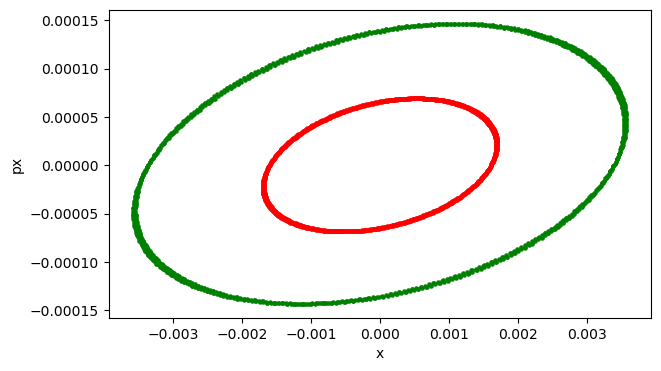

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
trackone_loaded.loc[trackone_loaded['number']==1].plot(x='x', y='px', kind='scatter', marker='.', c='r', ax=ax)
trackone_loaded.loc[trackone_loaded['number']==2].plot(x='x', y='px', kind='scatter', marker='.', c='g', ax=ax)